In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import math
import random
import numpy as np
import copy
from deonticAgent import deonticAgent
from virtuousAgent import virtuousAgent
from utilitarianAgent import utilitarianAgent
from transcendenceAgent import transcendenceAgent
from populationGraph import populationGraph
from plotFunctions import *
from adversarialAgent import adversarialAgent

In [2]:
#Network parameters
msgUtility = 10
costFactor = 0.1
numNodes = 20
numMsg = 200
myseed = 32
maxEpochs = 1000

In [3]:
dict = {"msgUtility" : 10,
"costFactor" : 0.1,
"numNodes" : 400,
"numMsg" : 4000,
"myseed" : 67,}

cumData = {'Utilitarian':[], 'Deontology':[], 'Virtue':[], 'Transcendence':[]}
overalProp = {'Utilitarian':0, 'Deontology':0, 'Virtue':0, 'Transcendence':0}
simulations = 10
for run in range(1,simulations):
    e = 0
    prevStates = []
    common_attrs = {"burnoutThreshold":2*(dict["numMsg"]*dict["costFactor"]*dict["msgUtility"])/dict["numNodes"],
    "burnoutDrop":2,"gamma":0.25, "maxVirtueUtility" : 4*(dict["numMsg"]/dict["numNodes"]), "forwardProb" : 0.9}
    network = populationGraph(dict["numNodes"],[0.25,0.25,0.25,0.25],[utilitarianAgent, deonticAgent, virtuousAgent, transcendenceAgent], common_attrs,seed=random.randint(0,1e7))
    min_run = 2

    # network.plotGraph()
    while e<maxEpochs:
        e+=1
        G = network.getGraph()
        msgList = network.createMsgs(dict["numMsg"], myseed=32)  #Message list creation
        prevStates = [copy.deepcopy(G.nodes[i]['agent']) for i in range(dict["numNodes"])]
        nf, nd = network.transmitMsgs()
        for i in range(dict["numNodes"]) : G.nodes[i]['agent'].epochUpdate()
        curStable = [G.nodes[i]['agent'].isStable(prevStates[i]) for i in range(dict["numNodes"])]
        if np.count_nonzero(curStable) == dict["numNodes"] and e > min_run:
            break
    #Test run
    print(run, e)
    network.reset()
    G = network.getGraph()
    msgList = network.createMsgs(dict["numMsg"])  #Message list creation
    nf, nd = network.transmitMsgs()
    outcomeNetwork = copy.deepcopy(network)

    dict["outcomeNetwork"] = outcomeNetwork
    propDict, agentDict = outcomeNetwork.getProportion()
    print("propDict ", propDict)
    for key in cumData:
        cumData[key].extend(agentDict[key])
        overalProp[key] += propDict[key]

for key in overalProp:
    overalProp[key]/=simulations
print(overalProp)

1 25
['Utilitarian', 'Deontology', 'Virtue', 'Transcendence']
{'Utilitarian': 0.2425, 'Deontology': 0.25, 'Virtue': 0.2325, 'Transcendence': 0.275}
propDict  {'Utilitarian': 0.2425, 'Deontology': 0.25, 'Virtue': 0.2325, 'Transcendence': 0.275}
2 20
['Utilitarian', 'Deontology', 'Virtue', 'Transcendence']
{'Utilitarian': 0.2525, 'Deontology': 0.22, 'Virtue': 0.2525, 'Transcendence': 0.275}
propDict  {'Utilitarian': 0.2525, 'Deontology': 0.22, 'Virtue': 0.2525, 'Transcendence': 0.275}
3 58
['Utilitarian', 'Deontology', 'Virtue', 'Transcendence']
{'Utilitarian': 0.24, 'Deontology': 0.235, 'Virtue': 0.255, 'Transcendence': 0.27}
propDict  {'Utilitarian': 0.24, 'Deontology': 0.235, 'Virtue': 0.255, 'Transcendence': 0.27}
4 45
['Utilitarian', 'Deontology', 'Virtue', 'Transcendence']
{'Utilitarian': 0.2525, 'Deontology': 0.2525, 'Virtue': 0.2675, 'Transcendence': 0.2275}
propDict  {'Utilitarian': 0.2525, 'Deontology': 0.2525, 'Virtue': 0.2675, 'Transcendence': 0.2275}
5 32
['Utilitarian', 'De

In [4]:
def plot_bar_local(agentDict, prop, opr = 'mean', simulations_count=1,fig_label='dummy'):
    types = list(agentDict.keys())
    propDict = {}
    prop_stderror = []
    for i in agentDict:
        if(opr == 'mean'):
            propDict[i] = np.mean([agent.getProperty(prop) for agent in agentDict[i]])
            prop_std = np.std([agent.getProperty(prop) for agent in agentDict[i]])
            prop_stderror.append(prop_std)
            # plt.bar(types,list(propDict.values()),yerr=prop_std_err,color=['b','g','r','y'], align='center', alpha=0.5, ecolor='black', capsize=10)
        elif(opr == 'sum'):
            propDict[i] = np.sum([agent.getProperty(prop) for agent in agentDict[i]])/simulations_count
            # plt.bar(types,list(propDict.values()),color=['b','g','r','y'], align='center', alpha=0.5, ecolor='black', capsize=10)
    prop_stderror = [value/len(prop_stderror) for value in prop_stderror]
    if(opr == 'mean'):
        plt.bar(types,list(propDict.values()),yerr=prop_stderror,color=['b','g','r','y'], align='center', alpha=0.5, ecolor='black', capsize=10)
    elif(opr == 'sum'):
        plt.bar(types,list(propDict.values()),color=['b','g','r','y'], align='center', alpha=0.5, ecolor='black', capsize=10)
    print(propDict)
    print("type ", types)
    y = list(propDict.values())
    for i in range(len(types)):
        plt.text(i,y[i]/2,round(y[i],2),ha = 'center')
    plt.xlabel("Type of Ethical Agent")
    if opr=="sum":
        plt.ylabel("Total " + prop)
    elif opr=="mean":
        plt.ylabel("Average " + prop)  
    plt.savefig("results/"+fig_label+".png", dpi=600)

{'Utilitarian': 85.17714285714285, 'Deontology': 85.51685393258427, 'Virtue': 87.4859075535513, 'Transcendence': 85.48523206751055}
type  ['Utilitarian', 'Deontology', 'Virtue', 'Transcendence']


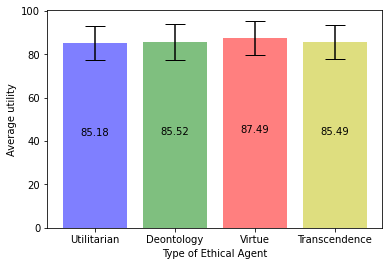

In [5]:
plot_bar_local(cumData, 'utility', opr ='mean', simulations_count=simulations,fig_label='mixed_pop/utility')


{'Utilitarian': 19.571428571428573, 'Deontology': 18.905617977528088, 'Virtue': 19.412626832018038, 'Transcendence': 19.29746835443038}
type  ['Utilitarian', 'Deontology', 'Virtue', 'Transcendence']


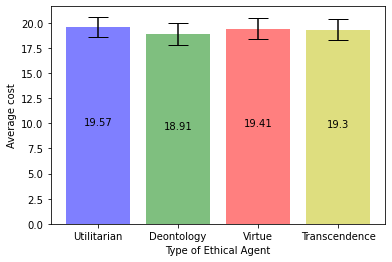

In [6]:
plot_bar_local(cumData, 'cost', opr='mean', simulations_count=simulations,fig_label='mixed_pop/cost')

{'Utilitarian': 30.3, 'Deontology': 28.5, 'Virtue': 31.8, 'Transcendence': 32.0}
type  ['Utilitarian', 'Deontology', 'Virtue', 'Transcendence']


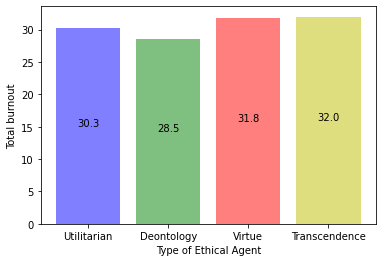

In [7]:
plot_bar_local(cumData, 'burnout', opr='sum', simulations_count=simulations,fig_label='mixed_pop/burnout')

{'Utilitarian': 0.9407511800696232, 'Deontology': 0.7866960826420943, 'Virtue': 0.8763441902546849, 'Transcendence': 0.8791743928281845}
type  ['Utilitarian', 'Deontology', 'Virtue', 'Transcendence']


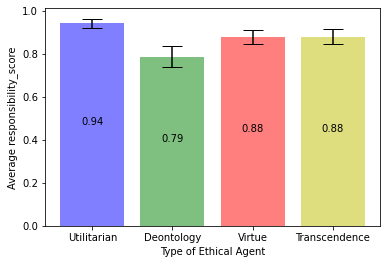

In [8]:
plot_bar_local(cumData, 'responsibility_score', opr='mean', simulations_count=simulations,fig_label='mixed_pop/fwd_ratio')